In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#!pip install lifelines
#!pip install --upgrade typing_extensions

In [2]:
from lifelines import WeibullAFTFitter, LogNormalAFTFitter, LogLogisticAFTFitter
from lifelines.utils import datetimes_to_durations

In [3]:
data = pd.read_csv('telco.csv')
data.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,Yes
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,Yes
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,No
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,Yes
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,No


In [4]:
print(data.columns)

Index(['ID', 'region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'retire', 'gender', 'voice', 'internet', 'forward', 'custcat', 'churn'],
      dtype='object')


In [5]:
#churn needs to be binary
data['churn'] = data['churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [6]:
categorical_cols = ['region', 'marital', 'ed', 'retire', 'gender', 'voice', 'internet', 'forward', 'custcat']
survival_df = pd.get_dummies(data, columns=categorical_cols, drop_first=True)
#making 0s to 0.0000001
survival_df["tenure"] = np.where(survival_df["tenure"] == 0, 0.00001, survival_df["tenure"])
survival_df.head()

,ID,tenure,age,address,income,churn,region_Zone 2,region_Zone 3,marital_Unmarried,ed_Did not complete high school,...,ed_Post-undergraduate degree,ed_Some college,retire_Yes,gender_Male,voice_Yes,internet_Yes,forward_Yes,custcat_E-service,custcat_Plus service,custcat_Total service
0,1,13.0,44,9,64,1,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,2,11.0,33,7,136,1,0,1,0,0,...,1,0,0,1,1,0,1,0,0,1
2,3,68.0,52,24,116,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
3,4,33.0,33,12,33,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,23.0,30,9,30,0,1,0,0,1,...,0,0,0,1,0,0,1,0,1,0


In [7]:
weibull_aft = WeibullAFTFitter()
log_normal_aft = LogNormalAFTFitter()
log_logistic_aft = LogLogisticAFTFitter()

weibull_aft.fit(survival_df, 'tenure', event_col='churn')
log_normal_aft.fit(survival_df, 'tenure', event_col='churn')
log_logistic_aft.fit(survival_df, 'tenure', event_col='churn')

<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>

In [8]:
print("Weibull AFT Model:")
print(weibull_aft.print_summary())

Weibull AFT Model:


<lifelines.WeibullAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1458.18
         time fit was run = 2024-05-01 18:36:52 UTC

---
                                          coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param   covariate                                                                                                                               
lambda_ ID                               -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
        address                           0.04       1.04       0.01             0.02             0.06                 1.03                 1.06
        age                               0.03       1.03       0.01             0.02             0.04                 1.02                 1.04
        custcat_E-service                 0.98       2.67       0.15             0.68             1.28                 1.97                 3.61
        custcat_Plus service              0.74       2.09       0.19             0.36             1.11                 1.43                 3.04
        custcat_Total service             0.96       2.62       0.21             0.55             1.38                 1.73                 3.97
        ed_Did not complete high school   0.46       1.59       0.19             0.08             0.84                 1.09                 2.32
        ed_High school degree             0.29       1.34       0.14             0.01             0.58                 1.01                 1.78
        ed_Post-undergraduate degree      0.18       1.19       0.19            -0.20             0.55                 0.82                 1.73
        ed_Some college                   0.25       1.29       0.14            -0.03             0.53                 0.97                 1.70
        forward_Yes                      -0.09       0.91       0.15            -0.38             0.20                 0.68                 1.22
        gender_Male                      -0.01       0.99       0.10            -0.21             0.19                 0.81                 1.20
        income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
        internet_Yes                     -0.79       0.46       0.14            -1.05            -0.52                 0.35                 0.60
        marital_Unmarried                -0.35       0.70       0.10            -0.56            -0.15                 0.57                 0.86
        region_Zone 2                    -0.06       0.94       0.13            -0.31             0.18                 0.73                 1.20
        region_Zone 3                     0.13       1.14       0.13            -0.12             0.38                 0.89                 1.46
        retire_Yes                        0.17       1.18       0.52            -0.85             1.18                 0.43                 3.26
        voice_Yes                        -0.29       0.75       0.15            -0.58            -0.00                 0.56                 1.00
        Intercept                         3.02      20.47       0.28             2.47             3.57                11.80                35.53
rho_    Intercept                         0.18       1.20       0.05             0.08             0.28                 1.09                 1.33

                                          cmp to     z      p   -log2(p)
param   covariate                                                       
lambda_ ID                                  0.00 -2.82 <0.005       7.72
        address                             0.00  4.79 <0.005      19.18
        age                              

None


In [9]:
print("\nLog-Normal AFT Model:")
print(log_normal_aft.print_summary())


Log-Normal AFT Model:


<lifelines.LogNormalAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1454.15
         time fit was run = 2024-05-01 18:36:52 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
mu_    ID                               -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
       address                           0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.06       2.90       0.17             0.73             1.40                 2.08                 4.04
       custcat_Plus service              0.94       2.55       0.22             0.52             1.36                 1.68                 3.89
       custcat_Total service             1.21       3.35       0.25             0.72             1.70                 2.06                 5.47
       ed_Did not complete high school   0.38       1.46       0.20            -0.02             0.77                 0.98                 2.16
       ed_High school degree             0.31       1.36       0.16            -0.01             0.62                 0.99                 1.87
       ed_Post-undergraduate degree     -0.05       0.95       0.22            -0.49             0.38                 0.61                 1.46
       ed_Some college                   0.29       1.33       0.16            -0.04             0.61                 0.96                 1.84
       forward_Yes                      -0.20       0.82       0.18            -0.56             0.15                 0.57                 1.16
       gender_Male                       0.04       1.04       0.11            -0.19             0.26                 0.83                 1.30
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.79       0.45       0.14            -1.07            -0.51                 0.34                 0.60
       marital_Unmarried                -0.44       0.64       0.11            -0.67            -0.22                 0.51                 0.80
       region_Zone 2                    -0.09       0.91       0.14            -0.37             0.18                 0.69                 1.20
       region_Zone 3                     0.06       1.06       0.14            -0.22             0.34                 0.81                 1.40
       retire_Yes                        0.02       1.02       0.44            -0.85             0.89                 0.43                 2.44
       voice_Yes                        -0.41       0.66       0.17            -0.74            -0.08                 0.48                 0.92
       Intercept                         2.57      13.09       0.30             1.97             3.17                 7.20                23.78
sigma_ Intercept                         0.27       1.31       0.05             0.18             0.36                 1.20                 1.43

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
mu_    ID                                  0.00 -2.39   0.02       5.89
       address                             0.00  4.80 <0.005      19.27
       age                                 0.00  4.59 <0.005      

None


In [10]:
print("\nLog-Logistic AFT Model:")
print(log_logistic_aft.print_summary())


Log-Logistic AFT Model:


<lifelines.LogLogisticAFTFitter: fitted with 1000 total observations, 726 right-censored observations>
             duration col = 'tenure'
                event col = 'churn'
   number of observations = 1000
number of events observed = 274
           log-likelihood = -1455.13
         time fit was run = 2024-05-01 18:36:52 UTC

---
                                         coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
param  covariate                                                                                                                               
alpha_ ID                               -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
       address                           0.04       1.04       0.01             0.02             0.06                 1.02                 1.06
       age                               0.03       1.03       0.01             0.02             0.05                 1.02                 1.05
       custcat_E-service                 1.05       2.84       0.16             0.72             1.37                 2.06                 3.92
       custcat_Plus service              0.87       2.39       0.21             0.46             1.28                 1.59                 3.60
       custcat_Total service             1.20       3.33       0.24             0.73             1.67                 2.08                 5.33
       ed_Did not complete high school   0.45       1.56       0.20             0.06             0.84                 1.06                 2.31
       ed_High school degree             0.32       1.38       0.15             0.02             0.62                 1.02                 1.86
       ed_Post-undergraduate degree     -0.06       0.94       0.21            -0.47             0.36                 0.62                 1.44
       ed_Some college                   0.25       1.29       0.15            -0.05             0.55                 0.95                 1.74
       forward_Yes                      -0.20       0.82       0.17            -0.53             0.14                 0.59                 1.15
       gender_Male                       0.02       1.02       0.11            -0.19             0.24                 0.82                 1.27
       income                            0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
       internet_Yes                     -0.81       0.44       0.14            -1.09            -0.54                 0.34                 0.59
       marital_Unmarried                -0.43       0.65       0.11            -0.65            -0.22                 0.52                 0.81
       region_Zone 2                    -0.05       0.96       0.13            -0.31             0.22                 0.73                 1.24
       region_Zone 3                     0.13       1.14       0.14            -0.14             0.39                 0.87                 1.48
       retire_Yes                        0.06       1.06       0.47            -0.87             0.99                 0.42                 2.70
       voice_Yes                        -0.36       0.69       0.16            -0.68            -0.05                 0.51                 0.95
       Intercept                         2.55      12.81       0.29             1.98             3.12                 7.22                22.73
beta_  Intercept                         0.35       1.41       0.05             0.25             0.45                 1.28                 1.56

                                         cmp to     z      p   -log2(p)
param  covariate                                                       
alpha_ ID                                  0.00 -2.43   0.01       6.06
       address                             0.00  4.48 <0.005      17.04
       age                                 0.00  4.74 <0.005    

None


The model with the lowest AIC is preferred as it offers a balance of model fit and complexity. In this case, the Log-Normal AFT model has the lowest AIC

All models show similar patterns in which predictors are significant (age, customer categories, internet usage), suggesting that the underlying relationships are robust across model types

the Weibull model often provides more interpretable parameters for survival analysis but may fit slightly worse according to the AIC.

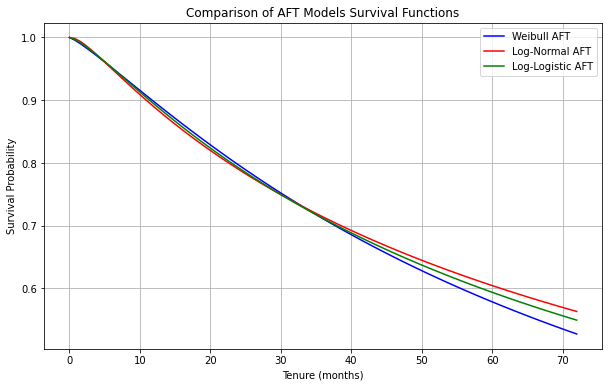

In [11]:
timeline = np.linspace(0, data['tenure'].max(), 100)

#mean survival function for each model
weibull_sf = weibull_aft.predict_survival_function(survival_df, times=timeline).mean(axis=1)
log_normal_sf = log_normal_aft.predict_survival_function(survival_df, times=timeline).mean(axis=1)
log_logistic_sf = log_logistic_aft.predict_survival_function(survival_df, times=timeline).mean(axis=1)

plt.figure(figsize=(10, 6))
plt.plot(timeline, weibull_sf, label='Weibull AFT', color='blue')
plt.plot(timeline, log_normal_sf, label='Log-Normal AFT', color='red')
plt.plot(timeline, log_logistic_sf, label='Log-Logistic AFT', color='green')

plt.title('Comparison of AFT Models Survival Functions')
plt.xlabel('Tenure (months)')
plt.ylabel('Survival Probability')
plt.legend()
plt.grid(True)
plt.show()

All three curves are closely aligned, which suggests that the underlying hazard functions captured by these models are similar.

There is slight divergence in the curves at the beginning and towards the end. These differences might be important depending on the critical time periods
 
Given the close fit and considering all factors, I would lean towards using the Log-Normal AFT model due to its slightly better statistical fit and close alignment with the Weibull model in terms of prediction.  However, if the context requires a model where the interpretation of the shape and scale of the survival function is crucial (and the slightly higher AIC of Weibull is acceptable) then the Weibull model could also be a suitable choice.

In [12]:
#we'll focus on the Log-Normal AFT

#filtering the dataset to include only significant features
survival_df = survival_df[["tenure", "churn", "address", "age", "custcat_E-service",
                           "custcat_Plus service", "custcat_Total service", "internet_Yes",
                           "marital_Unmarried", "voice_Yes"]]

#fit the Log-Normal AFT model with significant features
model_final = LogNormalAFTFitter()
model_final.fit(survival_df, duration_col='tenure', event_col='churn') 

print(model_final.summary)

                                  coef  exp(coef)  se(coef)  coef lower 95%  \
param  covariate                                                              
mu_    address                0.042824   1.043754  0.008847        0.025483   
       age                    0.036826   1.037512  0.006400        0.024283   
       custcat_E-service      1.025825   2.789395  0.169047        0.694499   
       custcat_Plus service   0.822553   2.276303  0.169425        0.490485   
       custcat_Total service  1.013269   2.754590  0.209579        0.602501   
       internet_Yes          -0.840528   0.431483  0.138259       -1.111511   
       marital_Unmarried     -0.447317   0.639341  0.114472       -0.671679   
       voice_Yes             -0.463493   0.629082  0.166771       -0.790359   
       Intercept              2.534887  12.615010  0.242611        2.059379   
sigma_ Intercept              0.283034   1.327150  0.046020        0.192836   

                              coef upper 95%  exp(c

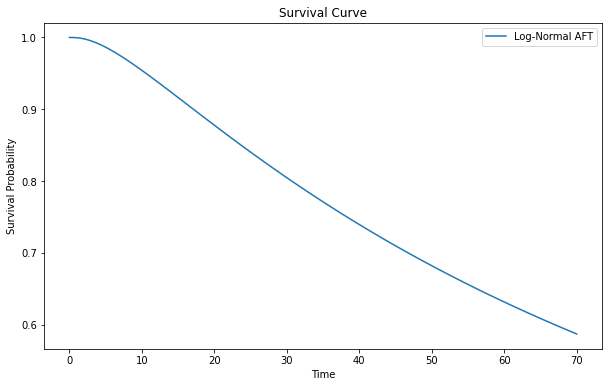

In [13]:
surv_func_final = model_final.predict_survival_function(survival_df.iloc[[0]], times=np.linspace(0, 70, 100))

plt.figure(figsize=(10, 6))
plt.plot(np.linspace(0, 70, 100), surv_func_final, label='Log-Normal AFT')
plt.title('Survival Curve')
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.legend()
plt.show()

### CLV

In [14]:
required_columns = log_normal_aft.params_.index
required_columns

MultiIndex([(   'mu_',                              'ID'),
            (   'mu_',                         'address'),
            (   'mu_',                             'age'),
            (   'mu_',               'custcat_E-service'),
            (   'mu_',            'custcat_Plus service'),
            (   'mu_',           'custcat_Total service'),
            (   'mu_', 'ed_Did not complete high school'),
            (   'mu_',           'ed_High school degree'),
            (   'mu_',    'ed_Post-undergraduate degree'),
            (   'mu_',                 'ed_Some college'),
            (   'mu_',                     'forward_Yes'),
            (   'mu_',                     'gender_Male'),
            (   'mu_',                          'income'),
            (   'mu_',                    'internet_Yes'),
            (   'mu_',               'marital_Unmarried'),
            (   'mu_',                   'region_Zone 2'),
            (   'mu_',                   'region_Zone 3'

In [15]:
mu_columns = [covariate for param, covariate in log_normal_aft.params_.index if param == 'mu_']

#covariate names
mu_columns

['ID',
 'address',
 'age',
 'custcat_E-service',
 'custcat_Plus service',
 'custcat_Total service',
 'ed_Did not complete high school',
 'ed_High school degree',
 'ed_Post-undergraduate degree',
 'ed_Some college',
 'forward_Yes',
 'gender_Male',
 'income',
 'internet_Yes',
 'marital_Unmarried',
 'region_Zone 2',
 'region_Zone 3',
 'retire_Yes',
 'voice_Yes',
 'Intercept']

In [16]:
for column in mu_columns:
    if column not in survival_df.columns:
        if column in ['age', 'income']: 
            default_value = data[column].median()  #median to handle outliers
        else:
            default_value = 0
        survival_df[column] = default_value

#now survival_df should be compatible with the model
pred_clv = log_normal_aft.predict_survival_function(survival_df)
print(pred_clv)

           0         1         2         3         4         5         6    \
1.0   0.999690  0.999888  0.999999  0.998144  0.999923  0.999958  0.997788   
2.0   0.998092  0.999212  0.999991  0.991163  0.999431  0.999667  0.989745   
3.0   0.995108  0.997819  0.999967  0.980433  0.998382  0.999012  0.977640   
4.0   0.990954  0.995743  0.999919  0.967343  0.996782  0.997975  0.963080   
5.0   0.985858  0.993065  0.999841  0.952807  0.994679  0.996573  0.947084   
...        ...       ...       ...       ...       ...       ...       ...   
68.0  0.579369  0.679946  0.946052  0.374352  0.712674  0.761405  0.353518   
69.0  0.575005  0.675949  0.944820  0.370135  0.708862  0.757937  0.349382   
70.0  0.570695  0.671989  0.943584  0.365993  0.705083  0.754493  0.345324   
71.0  0.566438  0.668067  0.942344  0.361926  0.701336  0.751071  0.341340   
72.0  0.562233  0.664181  0.941101  0.357931  0.697619  0.747673  0.337430   

           7         8         9    ...       990       991    

In [17]:
#Keeping 1 year
pred = pred_clv.loc[1:12, :]
pred

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
1.0,0.999690,0.999888,0.999999,0.998144,0.999923,0.999958,0.997788,0.996862,0.999996,0.999997,...,0.999882,0.999970,0.999776,1.000000,0.999909,0.996131,0.995360,0.999996,0.999953,0.999616
2.0,0.998092,0.999212,0.999991,0.991163,0.999431,0.999667,0.989745,0.986229,0.999957,0.999971,...,0.999175,0.999752,0.998565,0.999999,0.999342,0.983579,0.980878,0.999961,0.999634,0.997708
3.0,0.995108,0.997819,0.999967,0.980433,0.998382,0.999012,0.977640,0.970897,0.999850,0.999897,...,0.997726,0.999247,0.996227,0.999996,0.998152,0.965954,0.961018,0.999865,0.998921,0.994220
4.0,0.990954,0.995743,0.999919,0.967343,0.996782,0.997975,0.963080,0.952980,0.999657,0.999760,...,0.995574,0.998431,0.992897,0.999988,0.996356,0.945722,0.938579,0.999690,0.997799,0.989434
5.0,0.985858,0.993065,0.999841,0.952807,0.994679,0.996573,0.947084,0.933718,0.999370,0.999551,...,0.992804,0.997311,0.988744,0.999975,0.994014,0.924260,0.915055,0.999428,0.996290,0.983628
6.0,0.980017,0.989867,0.999731,0.937422,0.992133,0.994836,0.930295,0.913850,0.998985,0.999268,...,0.989503,0.995906,0.983920,0.999955,0.991196,0.902358,0.891275,0.999075,0.994429,0.977033
7.0,0.973591,0.986226,0.999587,0.921579,0.989200,0.992797,0.913130,0.893827,0.998502,0.998908,...,0.985752,0.994240,0.978551,0.999927,0.987966,0.880481,0.867709,0.998630,0.992250,0.969829
8.0,0.966705,0.982210,0.999406,0.905545,0.985931,0.990486,0.895861,0.873932,0.997922,0.998471,...,0.981620,0.992336,0.972743,0.999890,0.984383,0.858909,0.844628,0.998095,0.989790,0.962160
9.0,0.959464,0.977878,0.999189,0.889499,0.982373,0.987935,0.878673,0.854341,0.997250,0.997960,...,0.977167,0.990217,0.966583,0.999845,0.980498,0.837808,0.822185,0.997473,0.987079,0.954138
10.0,0.951948,0.973278,0.998935,0.873567,0.978565,0.985170,0.861686,0.835166,0.996488,0.997377,...,0.972446,0.987906,0.960142,0.999789,0.976355,0.817277,0.800461,0.996766,0.984149,0.945855


In [18]:
MM = 1300
r = 12
for col in range(1, len(pred.columns)+1):
    for row in range(1, 13):
        if row in pred.index and col in pred.columns:
            pred.at[row, col] = pred.at[row, col] / (1 + r / 12)**(row - 1)
data['CLV'] = MM * pred.sum(axis=0)
data.head()

,ID,region,tenure,age,marital,address,income,ed,retire,gender,voice,internet,forward,custcat,churn,CLV
0,1,Zone 2,13,44,Married,9,64,College degree,No,Male,No,No,Yes,Basic service,1,15186.600758
1,2,Zone 3,11,33,Married,7,136,Post-undergraduate degree,No,Male,Yes,No,Yes,Total service,1,2595.627242
2,3,Zone 3,68,52,Married,24,116,Did not complete high school,No,Female,No,No,No,Plus service,0,2599.287076
3,4,Zone 2,33,33,Unmarried,12,33,High school degree,No,Female,No,No,No,Basic service,1,2569.450858
4,5,Zone 2,23,30,Married,9,30,Did not complete high school,No,Male,No,No,Yes,Plus service,0,2596.536568


In [19]:
average_clv_left = data["CLV"].loc[(data["tenure"] <= 12) & (data["churn"] == 1)].mean()
print(f"Avg CLV left: {average_clv_left}")

Avg CLV left: 2529.394940368249


In [20]:
clv_yearly = data["CLV"].loc[(data["tenure"] <= 12) & (data["churn"] == 1)].sum()
print(f"Yearly CLV: {clv_yearly}")

Yearly CLV: 265586.4687386663


In [21]:
risk_threshold = 0.6
budget = data["CLV"].loc[(data["tenure"] <= 12) & (pred.iloc[-1] < risk_threshold)].sum()
print(budget)

459116.5709742914


# Report

In our analysis, we applied survival analysis techniques to uncover factors influencing churn risk within our customer base. Interpretation of coefficients highlighted significant predictors such as tenure, age, income and education level, each affecting churn risk uniquely. By examining survival probabilities we identified segments with varying levels of vulnerability, with younger, lower-income customers showing heightened risk. Valuable segments were defined based on CLV and propensity to remain loyal, with long-tenured, high-income customers representing the most valuable group.

As the dataset reflects the population, our annual retention budget would be approximately $459116.57, calculated based on CLV, survival probabilities, and the number of at-risk subscribers within a year. Among the models employed, the Log-Normal AFT model emerged as a preferred choice due to its slightly superior statistical fit and close alignment with the Weibull model. To enhance retention, I recommend implementing personalized strategies such as targeted promotions, improved customer service, and proactive outreach tailored to specific segments identified through our analysis. These efforts aim to mitigate churn risk and maximize long-term profitability by fostering customer satisfaction and loyalty.